In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
pharm_data = pd.read_csv("./data/Pharm Data_Data.csv")

In [22]:
pharm_reviews_train = pd.read_csv("./data/drugsComTrain_raw_addclass.csv")

## Total sales amount of different products classes (sales data)

['Antiseptics', 'Mood Stabilizers', 'Analgesics', 'Antibiotics', 'Antipiretics', 'Antimalarial', 'Else']


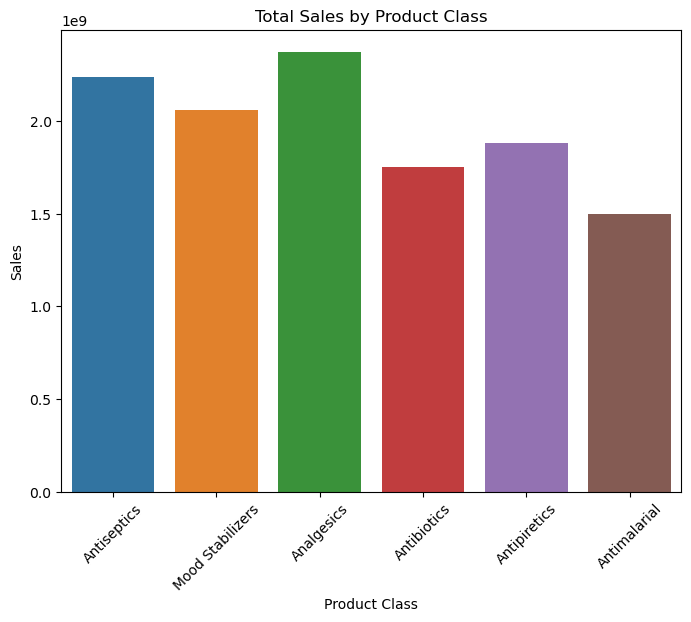

In [23]:
# 定义统一的类别顺序
common_order = pharm_data['Product Class'].value_counts().index
# 定义包含"Else"的类别顺序，放在最后
common_order_else = common_order[common_order != 'Else'].tolist() + ['Else']
print(common_order_else)
# 创建一个统一的颜色映射
color_palette = sns.color_palette(None, len(common_order))
color_dict = dict(zip(common_order, color_palette))
color_palette_else = sns.color_palette(None, len(common_order_else))
color_dict_else = dict(zip(common_order_else, color_palette_else))

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Product Class', 
    y='Sales', 
    data=pharm_data, 
    estimator=sum, 
    errorbar=None,
    hue='Product Class',
    order=common_order,
    palette=color_dict,
)
plt.title('Total Sales by Product Class')
plt.xticks(rotation=45)
plt.show()

## Monthly sales trend over time (sales data)

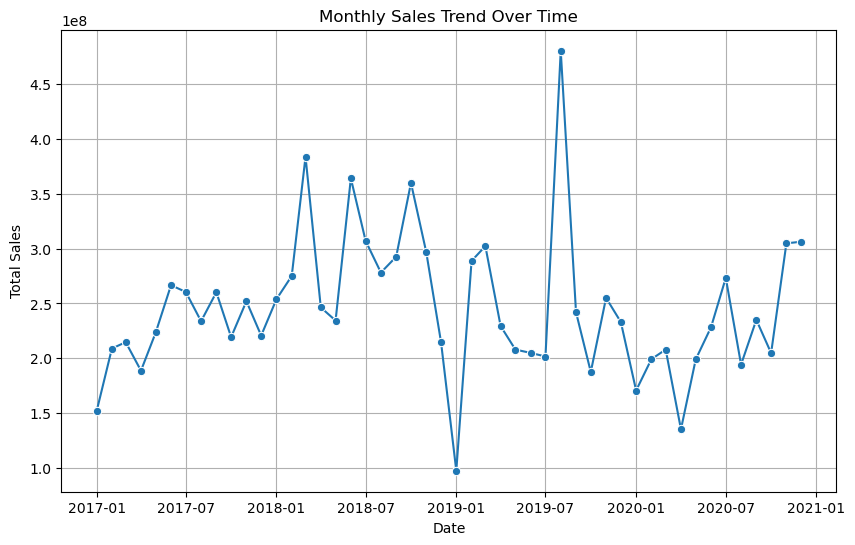

In [24]:
pharm_data['Date'] = pd.to_datetime(
    pharm_data['Month'] + ' ' + pharm_data['Year'].astype(str),
    format='%B %Y'  # %B=月份全名，%Y=四位年份
)

sales_trend = pharm_data.groupby('Date')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=sales_trend, marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Distribution of drug ratings (review data)

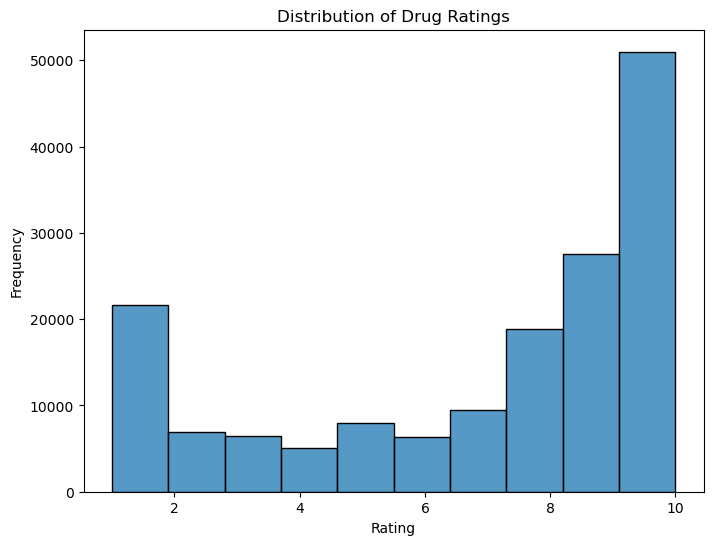

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(pharm_reviews_train['rating'], bins=10)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Average rating by product class (review data)

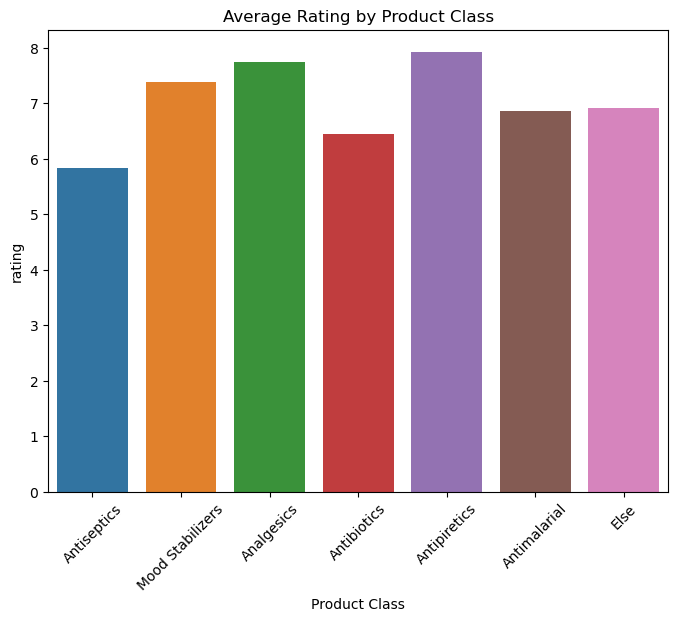

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Product Class', 
    y='rating', 
    data=pharm_reviews_train, 
    estimator=np.mean, 
    errorbar=None,
    hue='Product Class',
    legend=False,
    order=common_order_else,
    palette=color_dict_else,
)
plt.title('Average Rating by Product Class')
plt.xticks(rotation=45)
plt.show()

## Correlation between useful count and rating (review data)

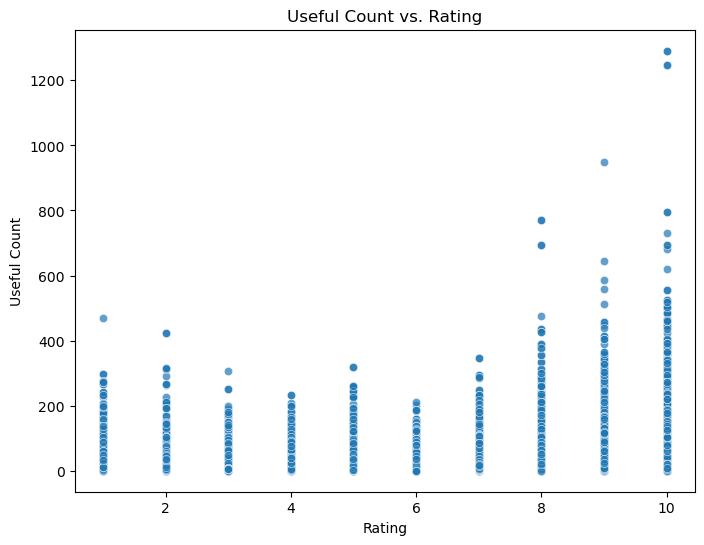

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='usefulCount', data=pharm_reviews_train, alpha=0.7)
plt.title('Useful Count vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

## Comparison of sales quantities between 2 datasets (sales data & review data)

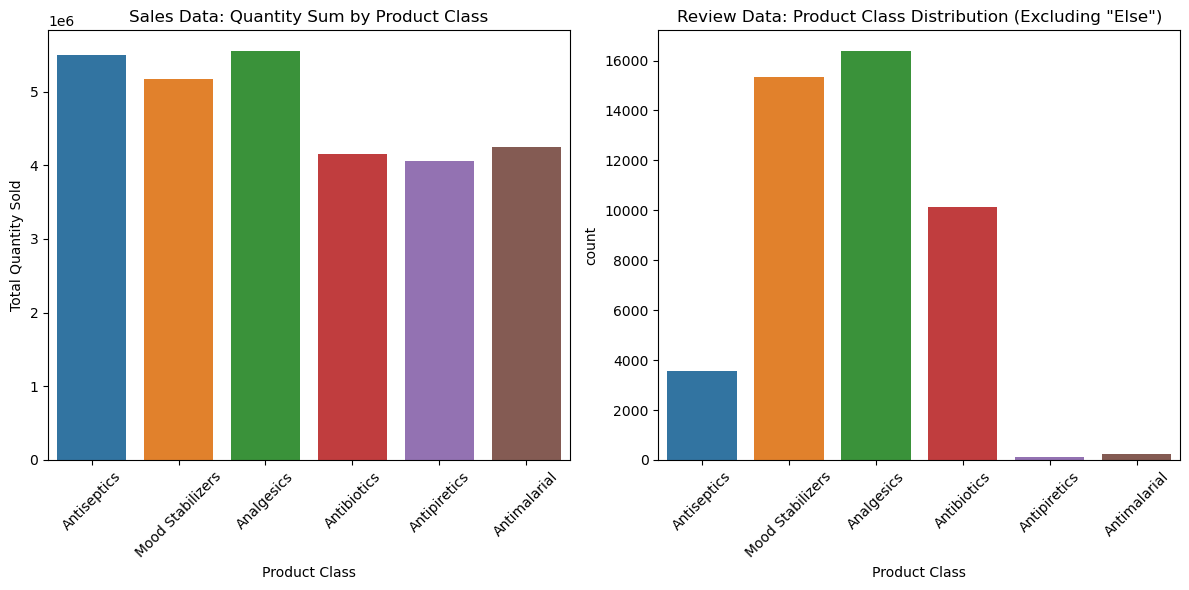

In [28]:
# 创建图形
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(
    x='Product Class', 
    y='Quantity', 
    data=pharm_data, 
    ax=axes[0], 
    order=common_order,
    estimator='sum',
    errorbar=None,
    palette=color_dict,  # 使用统一的颜色映射
    hue='Product Class',
    legend=False
)
axes[0].set_title('Sales Data: Quantity Sum by Product Class')
axes[0].set_ylabel('Total Quantity Sold')
axes[0].tick_params(axis='x', rotation=45)

review_data = pharm_reviews_train[pharm_reviews_train['Product Class'] != 'Else']
sns.countplot(
    x='Product Class', 
    data=review_data, 
    ax=axes[1], 
    order=common_order,
    palette=color_dict,  # 使用相同的颜色映射
    hue='Product Class',
    legend=False
)
axes[1].set_title('Review Data: Product Class Distribution (Excluding "Else")')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Comparison of sales quantities between two sales channels (sales data)

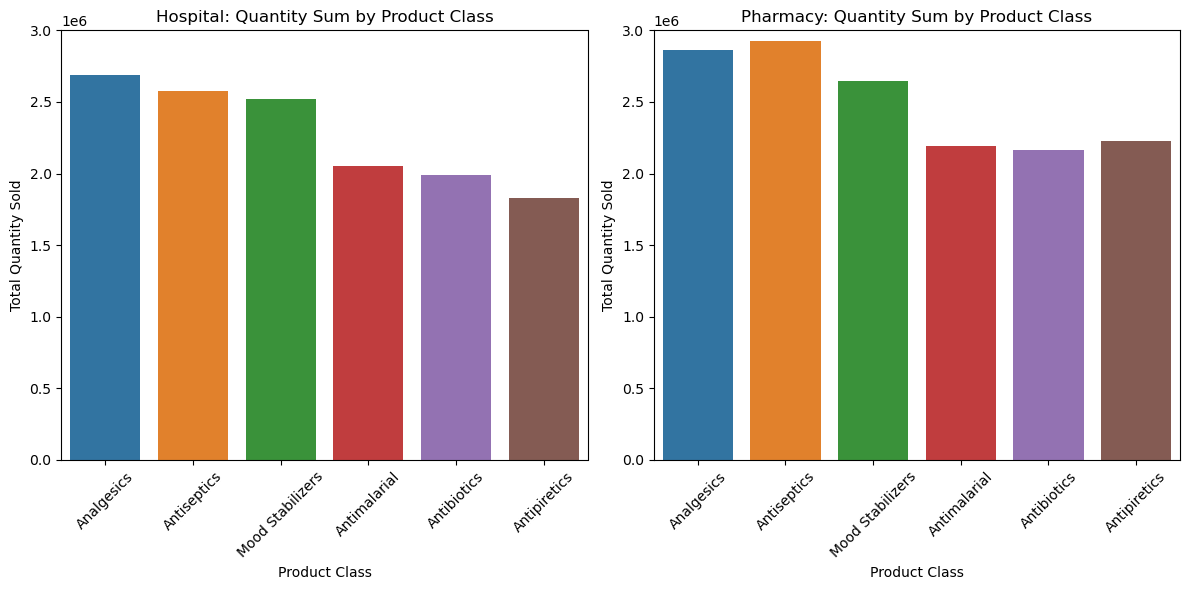

In [29]:
# 定义统一的类别顺序（按销售数据Quantity总和排序）
common_order = pharm_data.groupby('Product Class')['Quantity'].sum().sort_values(ascending=False).index

# 创建一个统一的颜色映射
color_palette = sns.color_palette(None, len(common_order))
color_dict = dict(zip(common_order, color_palette))

# 获取唯一的channel值
channels = pharm_data['Channel'].unique()

# 创建图形
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 遍历每个channel，在对应的子图中绘制柱状图
for i, channel in enumerate(channels):
    # 筛选当前channel的数据
    channel_data = pharm_data[pharm_data['Channel'] == channel]
    
    # 绘制柱状图
    sns.barplot(
        x='Product Class', 
        y='Quantity', 
        data=channel_data,
        hue='Product Class',
        ax=axes[i], 
        order=common_order,
        estimator='sum',
        errorbar=None,
        palette=color_dict,
        legend=False
    )
    
    # 设置标题和标签
    axes[i].set_title(f'{channel}: Quantity Sum by Product Class')
    axes[i].set_ylabel('Total Quantity Sold')
    axes[i].set_xlabel('Product Class')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 3e6)
plt.tight_layout()
plt.show()